# Time series and date functionality 

In [1]:
%run common.ipynb

import pandas as pd

# paths to the most commonly used dataset repositories for this lab

# path to pandas_for_everyone datasets repository
pfe_rep_path = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'

# path to data-wrangling-datasets repository
sv_rep_path = '../data/'

## Introduction

In this lab, we will learn to manipulate data with DateTime components. By no means does this notebook try to explain all the pandas features relating to DateTime, but it tries to cover the basics to get you comfortable with working with dates. References to the pandas documentation are provided wherever more information is required.

The four general time related concepts in pandas:

1. **Date times**: A specific date and time with timezone support. 

2. **Time deltas**: An absolute time duration. 

3. **Time spans**: A span of time defined by a point in time and its associated frequency.

4. **Date offsets**: A relative time duration that respects calendar arithmetic.

Let's refer to the pandas documentation to see the difference between the 4 types

Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview


### Date time

Create a TimeStamp / datetime object

In [2]:
datetime = pd.to_datetime('2022-01-07')
datetime

Timestamp('2022-01-07 00:00:00')

### Time span

In [3]:
period = pd.Period('01-2020')
period

Period('2020-01', 'M')

We observe that 'M' denotes that the period spans a month.

### Time delta

Timedelta shifts a date time by the corresponding calendar duration specified.

In [4]:
timedelta = pd.Timedelta(days=1)
timedelta

Timedelta('1 days 00:00:00')

In [5]:
datetime + timedelta

Timestamp('2022-01-08 00:00:00')

### Date offsets 
A DateOffset is similar to a Timedelta that represents a duration of time but follows specific calendar duration rules.  

In [6]:
date = datetime
date.day_name()

'Friday'

In [7]:
date_next = date + 2 * pd.offsets.BDay()
date_next.day_name()

'Tuesday'

In general we can use `TimeDelta` and `DateOffset` to specify a duration of time

### Weather Data

This weather data is collected from https://www.ncdc.noaa.gov/cdo-web/ where free access is provided to global historic climate data. For this exercise, we take a subset of the data collected from the New Orleans Lakefront Airport station. Specifically, we will work with four variables.

Columns

* AWND = Average daily wind speed (miles per hour)
* PRCP = Precipitation (inches to hundredths)
* TMAX = Maximum temperature (Fahrenheit)
* TMIN = Minimum temperature (Fahrenheit)

In [8]:
source = sv_rep_path + 'New_Orleans_Lakefront_Airport_weather_2021_subset.csv'

data = pd.read_csv(source)
data.head()

,STATION,NAME,DATE,AWND,PRCP,TMIN,TMAX
0,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",01-01-2021,13.42,0.0,56.0,69.0
1,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",02-01-2021,13.87,0.0,48.0,57.0
2,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",03-01-2021,7.83,0.0,47.0,56.0
3,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",04-01-2021,6.49,0.0,44.0,68.0
4,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",05-01-2021,5.82,0.0,52.0,61.0


## Load a datetime column

Let's look at the datatype of the `DATE` column.

In [9]:
data['DATE'].head()

0    01-01-2021
1    02-01-2021
2    03-01-2021
3    04-01-2021
4    05-01-2021
Name: DATE, dtype: object

The datatype is `object`. To be able to perform datetime manipulations, we need to firstly convert it to a `datetime` datatype using `pd.to_datetime()` method. 

Python strftime cheatsheet: https://strftime.org/

In [10]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
data['DATE'].head()

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: DATE, dtype: datetime64[ns]

###  Convert to datetime while loading the data

If the name of the column and the date format is predetermined, we can convert the date column to a DateTime object while loading the dataset as follows:

In [11]:
source = sv_rep_path + 'New_Orleans_Lakefront_Airport_weather_2021_subset.csv'

data = pd.read_csv(source, parse_dates=['DATE'],                              # the column to parse as date
                   date_parser = lambda x: pd.to_datetime(x, 
                                                          format='%d-%m-%Y'   # format of the date
                                                         )
                  )

data['DATE'].head()

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: DATE, dtype: datetime64[ns]

## Access datetime attributes 

For Timestamp objects, Datetime attributes can be accessed directly.

In [12]:
data.loc[0, 'DATE']

Timestamp('2021-01-01 00:00:00')

In [13]:
data.loc[0, 'DATE'].year

2021

To access the datetime attributes of a dataframe column, we use the `.dt` accessor. 

For a list of all the properties that can be accessed through the `.dt` accessor refer: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

In [14]:
data['DATE'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
357    12
358    12
359    12
360    12
361    12
Name: DATE, Length: 362, dtype: int64

Series of datetime datatype will generally be treated as numeric datatype when methods like `min`, `max`, `mean` are applied. 

In [15]:
data['DATE'].max()

Timestamp('2021-12-31 00:00:00')

They need to explicitly mentioned while using the `.describe()`

In [16]:
data['DATE'].describe(datetime_is_numeric=True)

count                              362
mean     2021-07-01 12:03:58.674033152
min                2021-01-01 00:00:00
25%                2021-04-01 06:00:00
50%                2021-06-30 12:00:00
75%                2021-10-01 18:00:00
max                2021-12-31 00:00:00
Name: DATE, dtype: object

## Filter dates 

Dates can be filtered in several different ways. 

### filter by string

In [17]:
filter = (data['DATE'] <= '2021-01-05') 

data.loc[filter]

,STATION,NAME,DATE,AWND,PRCP,TMIN,TMAX
0,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-01,13.42,0.0,56.0,69.0
1,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-02,13.87,0.0,48.0,57.0
2,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-03,7.83,0.0,47.0,56.0
3,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-04,6.49,0.0,44.0,68.0
4,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-05,5.82,0.0,52.0,61.0


### filter by datetime

In [18]:
timestamp = pd.to_datetime('2021-01-05')
filter = (data['DATE'] <= timestamp) 

data.loc[filter]

,STATION,NAME,DATE,AWND,PRCP,TMIN,TMAX
0,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-01,13.42,0.0,56.0,69.0
1,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-02,13.87,0.0,48.0,57.0
2,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-03,7.83,0.0,47.0,56.0
3,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-04,6.49,0.0,44.0,68.0
4,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",2021-01-05,5.82,0.0,52.0,61.0


### filter by slicing 
For filtering by slicing, we must set the index to the `DATE` column.

In [19]:
data.set_index('DATE', inplace=True)
data

,STATION,NAME,AWND,PRCP,TMIN,TMAX
DATE,,,,,,
2021-01-01,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",13.42,0.00,56.0,69.0
2021-01-02,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",13.87,0.00,48.0,57.0
2021-01-03,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",7.83,0.00,47.0,56.0
2021-01-04,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",6.49,0.00,44.0,68.0
2021-01-05,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",5.82,0.00,52.0,61.0
...,...,...,...,...,...,...
2021-12-27,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",7.61,0.00,64.0,78.0
2021-12-28,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",14.09,0.30,68.0,81.0
2021-12-29,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",12.75,0.00,71.0,82.0


In [20]:
data['2021-01-05': '2021-01-15']

,STATION,NAME,AWND,PRCP,TMIN,TMAX
DATE,,,,,,
2021-01-05,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",5.82,0.00,52.0,61.0
2021-01-06,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",12.30,0.00,51.0,62.0
2021-01-07,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",22.15,0.97,50.0,64.0
2021-01-08,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",21.25,0.00,43.0,51.0
2021-01-09,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",15.66,0.00,41.0,51.0
2021-01-10,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",15.66,0.13,40.0,45.0
2021-01-11,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",18.12,0.48,41.0,46.0
2021-01-12,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",9.17,0.00,38.0,44.0
2021-01-13,USW00053917,"NEW ORLEANS LAKEFRONT AIRPORT, LA US",4.47,0.00,39.0,55.0


## Resampling

Resampling works similar to `.groupby()`. It is a convenient method to resample `datetime` indexed data. Let's learn about it with a simple example. 

Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

In [21]:
tmax = data.TMAX
tmax

DATE
2021-01-01    69.0
2021-01-02    57.0
2021-01-03    56.0
2021-01-04    68.0
2021-01-05    61.0
              ... 
2021-12-27    78.0
2021-12-28    81.0
2021-12-29    82.0
2021-12-30    83.0
2021-12-31    82.0
Name: TMAX, Length: 362, dtype: float64

This series object is indexed by dates and is a record of the maximum temperatures during each day. We may be interested to know the maximum temperature for each month. To do this, we will need to resample the data 

DateOffset format strings reference: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [22]:
tmax.resample(rule='M') # The offset string or object representing target conversion.

a `DatetimeIndexResampler` object is returned. It is similar to `.groupby()` where in all the dates of a particular month are grouped together. Let's aggregate using the `.max()` to get the maximum temperature for each month.

In [23]:
tmax_month = tmax.resample('M').max()
tmax_month

DATE
2021-01-31    79.0
2021-02-28    85.0
2021-03-31    86.0
2021-04-30    88.0
2021-05-31    90.0
2021-06-30    94.0
2021-07-31    96.0
2021-08-31    95.0
2021-09-30    93.0
2021-10-31    88.0
2021-11-30    79.0
2021-12-31    83.0
Freq: M, Name: TMAX, dtype: float64

Now we may want to resample the entire dataframe by month. `.max()` may  not work for all the columns. So let's try resampling and aggregating by mean.

In [24]:
data_resampled = data.resample('M').mean()
data_resampled

,AWND,PRCP,TMIN,TMAX
DATE,,,,
2021-01-31,11.761935,0.078065,48.935484,62.709677
2021-02-28,12.582500,0.175714,46.296296,62.500000
2021-03-31,12.649355,0.306452,60.677419,74.709677
2021-04-30,12.012667,0.338333,64.300000,78.137931
2021-05-31,11.812903,0.377097,71.290323,82.870968
2021-06-30,9.551667,0.395000,77.333333,88.833333
2021-07-31,7.323871,0.221935,79.032258,90.354839
2021-08-31,7.557500,0.190357,79.785714,91.392857
2021-09-30,8.310000,0.285517,74.500000,85.607143


However aggregating each column by mean doesn't make sense for this dataset. In case of `PRCP` - precipitation, we would require the total precipitation of the week, for `TMIN` and `TMAX` we require the min and max from the week. We notice that each column requires a different aggregation method. 

For this case, we can resample and aggregate using `.agg` method where we specify the aggregation method for each column.

In [25]:
agg_dict = {'AWND': 'mean', 'PRCP': 'sum', 'TMIN': 'min', 'TMAX': 'max'}

data_resampled = data.resample('M').agg(agg_dict)
data_resampled

,AWND,PRCP,TMIN,TMAX
DATE,,,,
2021-01-31,11.761935,2.42,38.0,79.0
2021-02-28,12.582500,4.92,27.0,85.0
2021-03-31,12.649355,9.50,45.0,86.0
2021-04-30,12.012667,10.15,50.0,88.0
2021-05-31,11.812903,11.69,65.0,90.0
2021-06-30,9.551667,11.85,72.0,94.0
2021-07-31,7.323871,6.88,74.0,96.0
2021-08-31,7.557500,5.33,75.0,95.0
2021-09-30,8.310000,8.28,66.0,93.0


The index shows the last day of the month, however the `day` of the month doesn't make sense in this context. We can convert it to month `period`s as follows

In [26]:
data_resampled.index = data_resampled.index.to_period('M')
data_resampled

,AWND,PRCP,TMIN,TMAX
DATE,,,,
2021-01,11.761935,2.42,38.0,79.0
2021-02,12.582500,4.92,27.0,85.0
2021-03,12.649355,9.50,45.0,86.0
2021-04,12.012667,10.15,50.0,88.0
2021-05,11.812903,11.69,65.0,90.0
2021-06,9.551667,11.85,72.0,94.0
2021-07,7.323871,6.88,74.0,96.0
2021-08,7.557500,5.33,75.0,95.0
2021-09,8.310000,8.28,66.0,93.0


## Calculations with dates

### Introduction to the Ebola dataset

The Ebola dataset records the case count and death count of 8 countries including Guinea, Liberia, SierraLeone, Nigeria, Senegal, United States, Spain, and Mali from March of 2014. Let's load this dataset from the `pandas for everyone` dataset repository.

In [27]:
source = pfe_rep_path + 'country_timeseries.csv'

data = pd.read_csv(source)

In [28]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,122,122,1/5/2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,122.0,NaN,NaN,NaN,144.778689,89.31646,0.0,66.25,150.0,219.5,289.0
Cases_Guinea,93.0,NaN,NaN,NaN,911.064516,849.108801,49.0,236.0,495.0,1519.0,2776.0
Cases_Liberia,83.0,NaN,NaN,NaN,2335.337349,2987.966721,3.0,25.5,516.0,4162.5,8166.0
Cases_SierraLeone,87.0,NaN,NaN,NaN,2427.367816,3184.803996,0.0,64.5,783.0,3801.0,10030.0
Cases_Nigeria,38.0,NaN,NaN,NaN,16.736842,5.998577,0.0,15.0,20.0,20.0,22.0
Cases_Senegal,25.0,NaN,NaN,NaN,1.08,0.4,1.0,1.0,1.0,1.0,3.0
Cases_UnitedStates,18.0,NaN,NaN,NaN,3.277778,1.178511,1.0,3.0,4.0,4.0,4.0
Cases_Spain,16.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Cases_Mali,12.0,NaN,NaN,NaN,3.5,2.746899,1.0,1.0,2.5,6.25,7.0


For this exercise we focus on case count of each country. Let's subset the data to include those columns alone.

In [29]:
data = data.loc[:, 'Date':'Cases_Mali']

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                122 non-null    object 
 1   Day                 122 non-null    int64  
 2   Cases_Guinea        93 non-null     float64
 3   Cases_Liberia       83 non-null     float64
 4   Cases_SierraLeone   87 non-null     float64
 5   Cases_Nigeria       38 non-null     float64
 6   Cases_Senegal       25 non-null     float64
 7   Cases_UnitedStates  18 non-null     float64
 8   Cases_Spain         16 non-null     float64
 9   Cases_Mali          12 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.7+ KB


The datatype of the Date column is `object`. Let's convert it to `datetime` and set it as the index.

In [31]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day                 122 non-null    int64  
 1   Cases_Guinea        93 non-null     float64
 2   Cases_Liberia       83 non-null     float64
 3   Cases_SierraLeone   87 non-null     float64
 4   Cases_Nigeria       38 non-null     float64
 5   Cases_Senegal       25 non-null     float64
 6   Cases_UnitedStates  18 non-null     float64
 7   Cases_Spain         16 non-null     float64
 8   Cases_Mali          12 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 9.5 KB


Let's view the first and last few rows of the dataset

In [33]:
data.head(10).T

Date,2015-01-05,2015-01-04,2015-01-03,2015-01-02,2014-12-31,2014-12-28,2014-12-27,2014-12-24,2014-12-21,2014-12-20
Day,289.0,288.0,287.0,286.0,284.0,281.0,280.0,277.0,273.0,272.0
Cases_Guinea,2776.0,2775.0,2769.0,NaN,2730.0,2706.0,2695.0,2630.0,2597.0,2571.0
Cases_Liberia,NaN,NaN,8166.0,8157.0,8115.0,8018.0,NaN,7977.0,NaN,7862.0
Cases_SierraLeone,10030.0,9780.0,9722.0,NaN,9633.0,9446.0,9409.0,9203.0,9004.0,8939.0
Cases_Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Senegal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Mali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data.tail(10).T

Date,2014-04-04,2014-04-01,2014-03-31,2014-03-29,2014-03-28,2014-03-27,2014-03-26,2014-03-25,2014-03-24,2014-03-22
Day,13.0,10.0,9.0,7.0,6.0,5.0,4.0,3.0,2.0,0.0
Cases_Guinea,143.0,127.0,122.0,112.0,112.0,103.0,86.0,86.0,86.0,49.0
Cases_Liberia,18.0,8.0,8.0,7.0,3.0,8.0,NaN,NaN,NaN,NaN
Cases_SierraLeone,2.0,2.0,2.0,NaN,2.0,6.0,NaN,NaN,NaN,NaN
Cases_Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Senegal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Mali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

1. The dates are arranged in descending order 
2. The date range contains a few missing dates. The frequencies of cases and deaths have not been recorded on these dates. For example, 2014-03-23 is missing
3. All countries do not have the same start date of the outbreak.

Our goal for this exercise: Compare the speed at which the disease spreads in each country, i.e. Compare the number of cases in each country on the nth day of the outbreak. Here's an illustration of the current data structure.

![date_calc_01.PNG](images\date_calc_01.PNG)

We will manipulate the dataset as follows:
1. Create a new index containing all the dates using pd.date_range() and arrange in ascending order for convenience.
![date_calc_02.PNG](images\date_calc_03.PNG)

2. Get the`day_0` of the outbreak of each country by calculating the difference between the earliest date in the dataset and the first date of the outbreak in each country
3. Shift the column values by the calculated `day_0`

![date_calc_02.PNG](images\date_calc_04.PNG)


### Date Range

The `pd.date_range()` method creates a series of `datetimeIndex` with fixed frequency. Similar to the python range function, it takes in a start date, end date, and freq.

Documentation: https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

In [35]:
idx_new = pd.date_range(data.index.min(), data.index.max(), freq='D')
idx_new

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

Let's reindex the dataset with the new index. Note that if there are no records for a particular date, the row is filled with null values. Also note that the dates are arranged in ascending order.

In [36]:
data = data.reindex(idx_new)

In [37]:
data.head(10).T

,2014-03-22,2014-03-23,2014-03-24,2014-03-25,2014-03-26,2014-03-27,2014-03-28,2014-03-29,2014-03-30,2014-03-31
Day,0.0,NaN,2.0,3.0,4.0,5.0,6.0,7.0,NaN,9.0
Cases_Guinea,49.0,NaN,86.0,86.0,86.0,103.0,112.0,112.0,NaN,122.0
Cases_Liberia,NaN,NaN,NaN,NaN,NaN,8.0,3.0,7.0,NaN,8.0
Cases_SierraLeone,NaN,NaN,NaN,NaN,NaN,6.0,2.0,NaN,NaN,2.0
Cases_Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Senegal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cases_Mali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We notice that 2014-03-23 has been added.

To find the day 0 of outbreak for each country, we look at the first non-null value of case count for each country. 

In [38]:
first_valid = data.apply(pd.Series.first_valid_index)
first_valid

Day                  2014-03-22
Cases_Guinea         2014-03-22
Cases_Liberia        2014-03-27
Cases_SierraLeone    2014-03-27
Cases_Nigeria        2014-07-23
Cases_Senegal        2014-08-31
Cases_UnitedStates   2014-10-01
Cases_Spain          2014-10-08
Cases_Mali           2014-10-22
dtype: datetime64[ns]

### Subtract two DateTime objects

We subtract the first valid date from the first recorded date to get the start of the outbreak in each country in relation to the start of the first recorded date.

In [39]:
day_0 = first_valid - data.index.min()
day_0

Day                    0 days
Cases_Guinea           0 days
Cases_Liberia          5 days
Cases_SierraLeone      5 days
Cases_Nigeria        123 days
Cases_Senegal        162 days
Cases_UnitedStates   193 days
Cases_Spain          200 days
Cases_Mali           214 days
dtype: timedelta64[ns]

### Shift index
Fianlly, we shift the column values by the calculated `day_0`

The index of a column can be shifted by a given `period` using the `pandas.DataFrame.shift` method.   

Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [40]:
data_dict = {}                             # empty dict to store the new columns
for idx, col in enumerate(data):
    d_0 = -day_0[idx].days                 # number of days to shift by. We shift by '-days' to shift the columns' upwards'
    shifted = data[col].shift(d_0)
    data_dict[col] = shifted

data_shift = pd.DataFrame(data_dict)
data_shift.head()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali
2014-03-22,0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0
2014-03-23,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN


The index should be of datatype `timedelta` representing the nth day of outbreak

In [41]:
data_shift.index = data.index - data.index.min()
data_shift.drop('Day', axis=1, inplace=True)
data_shift.head(10).T

,0 days,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days
Cases_Guinea,49.0,NaN,86.0,86.0,86.0,103.0,112.0,112.0,NaN,122.0
Cases_Liberia,8.0,3.0,7.0,NaN,8.0,8.0,NaN,NaN,18.0,NaN
Cases_SierraLeone,6.0,2.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN
Cases_Nigeria,0.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,4.0
Cases_Senegal,1.0,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN
Cases_UnitedStates,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
Cases_Spain,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
Cases_Mali,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN


Let's plot

<AxesSubplot:>

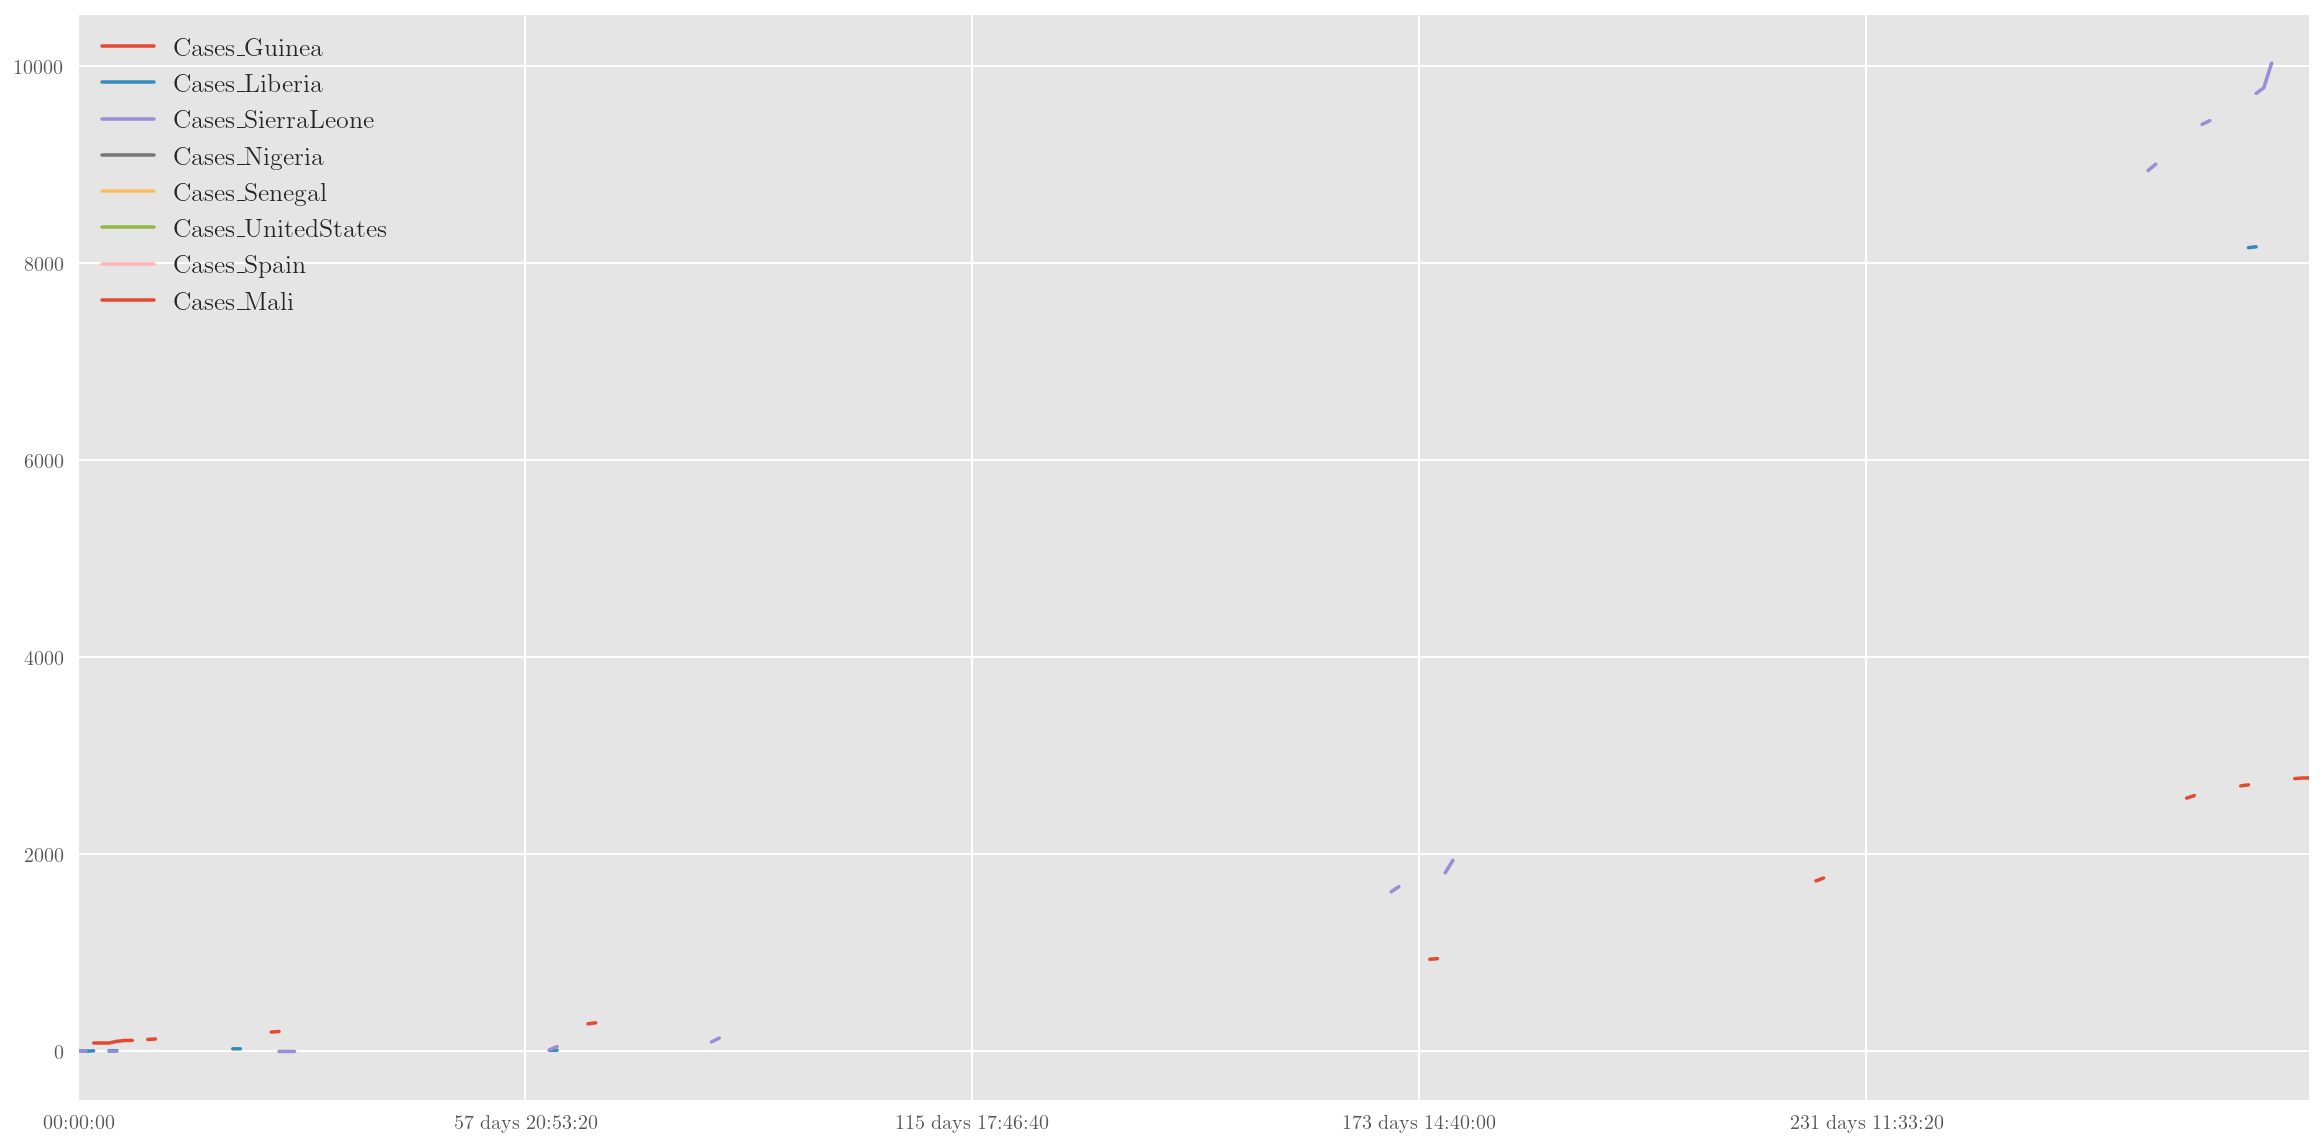

In [42]:
data_shift.plot()

We will learn how to deal with these missing values in a later lab, specifically how to interpolate the missing data to produce a readable line plot 

In [43]:
# interpolate missing values
for col in data_shift.columns:
    data_shift[col] = data_shift[col].interpolate(method='linear', limit_direction='forward', axis=0)

data_shift = data_shift.reset_index()

# melt the Dataframe
ebola_melt = data_shift.melt(id_vars='index', var_name='country', value_name='cases')

cases_country = ebola_melt['country'].str.split('_', expand=True)
ebola_melt['country'] = cases_country[1]
ebola_melt['index'] = (ebola_melt['index']/ np.timedelta64(1, 'D')).astype('int')

In [44]:
import altair as alt

alt.Chart(ebola_melt).mark_line().encode(x='index', y='cases', color='country', tooltip=['cases', 'country'])



alt.Chart(...)

the small number of cases for countries other than SierraLeone, Liberia, and Guinea means it is difficult to see them in the plot.